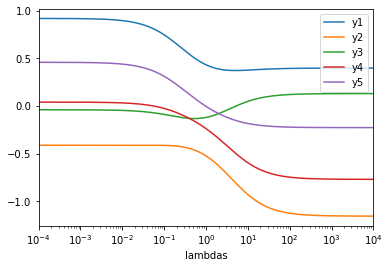

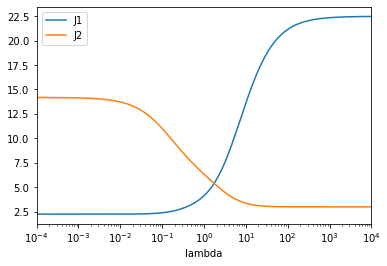

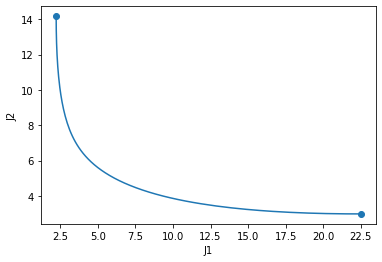

In [2]:
#1)use the gram-schmidt algorithm
import numpy as np
def gram_schmidt(a):
    q=[]
    for i in range(len(a)):
        #orthogonalization
        q_tilde=a[i]
        for j in range(len(q)):
            q_tilde = q_tilde - (q[j]@a[i])*q[j]
        q_tilde = q_tilde / np.sqrt(sum(q_tilde**2))
        q.append(q_tilde) #此处q[i]代表Q的第i行
    return q

#2)QR factorization
def QR_factorization(A):
    Q_transpose = np.array(gram_schmidt(A.T))
    R = Q_transpose @ A
    Q = Q_transpose.T
    return Q,R
#or we can use the function: Q,R = np linalg.qr(A)

#3)back substitution
def back_subst(R,b_tilde): #there R is a upper matrix
    n = R.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = b_tilde[i]
        for j in range(i+1,n):
            x[i] = x[i] - R[i,j]*x[j]
        x[i] = x[i]/R[i,i]
    return x

#4)solving system of linear equations, here x is the pseudo-matrix.
def solve_via_backsub(A,b):
    Q,R = QR_factorization(A)
    b_tilde = Q.T @ b
    x= back_subst(R,b_tilde)
    return x
#also we can use the function: np.linalg.solve(A,b) ,which is faster than np.linalg.inv(A)@ b in some cases.

#15.1 multi-objective least sqaures
# As:a list of coefficient matrices(of possibly different heights)
# bs:given as an array or list,lambdas
import numpy as np
def mols_solve(As,bs,lambdas):
    k = len(lambdas)
    Atil = np.vstack([np.sqrt(lambdas[i])*As[i] for i in range(k)])
    btil = np.hstack([np.sqrt(lambdas[i])*bs[i] for i in range(k)])
    return solve_via_backsub(Atil,btil)

#simple example
As = np.array([np.random.normal(size = (10,5)),np.random.normal(size = (10,5))])
bs = np.vstack([np.random.normal(size = 10),np.random.normal(size = 10)])

N = 200
lambdas = np.power(10,np.linspace(-4,4,200)) #10的次方
x = np.zeros((5,N))
J1 = np.zeros(N)
J2 = np.zeros(N)
for k in range(N):
    x[:,k] = mols_solve(As,bs,[1,lambdas[k]])
    J1[k] = np.linalg.norm(As[0]@x[:,k] - bs[0])**2
    J2[k] = np.linalg.norm(As[1]@x[:,k] - bs[1])**2
    
import matplotlib.pyplot as plt
plt.ion()

#plot solution versus lambda
plt.plot(lambdas,x.T)
plt.xscale('log')
plt.xlabel('lambdas')
plt.xlim((1e-4,1e+4))
plt.legend(['y1','y2','y3','y4','y5'], loc='upper right')
plt.show()

#plot two objectives versus lambda
plt.plot(lambdas,J1)
plt.plot(lambdas,J2)
plt.xscale('log')
plt.xlabel('lambda')
plt.xlim((1e-4,1e+4))
plt.legend(['J1','J2'])
plt.show()

#plot trade-off curve
plt.plot(J1,J2)
plt.xlabel('J1')
plt.ylabel('J2')
#plt.scatter([J1[80],J1[110],J1[150]],[J2[80],J2[110],J2[150]])

#add(single objective) end points to trade-off curve 两个端点
x1 = solve_via_backsub(As[0],bs[0])
x2 = solve_via_backsub(As[1],bs[1])
J1 = [np.linalg.norm(As[0]@x1 - bs[0])**2,np.linalg.norm(As[0]@x2 - bs[0])**2]
J2 = [np.linalg.norm(As[1]@x1 - bs[1])**2,np.linalg.norm(As[1]@x2 - bs[1])**2]
plt.scatter(J1,J2)
plt.show()

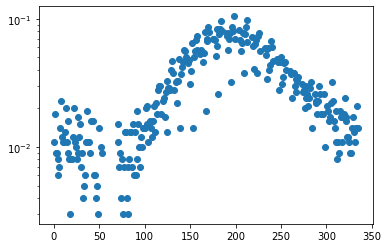

[-3.92647696 -3.77948466 -3.93466968 -3.78761524 -3.93240583 -3.89193163
 -3.77633233 -3.67005694 -3.93197426 -3.89777669 -3.80426534 -3.75848834
 -3.65158669 -3.72590897 -3.74088401 -3.77600152 -3.81183591 -3.66333497
 -3.79557835 -3.77674246 -3.74074803 -3.74398562 -3.82589115 -3.85776507]


C:\Users\15829\AppData\Local\Temp\ipykernel_20984\2815976582.py:170: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log',base=10)


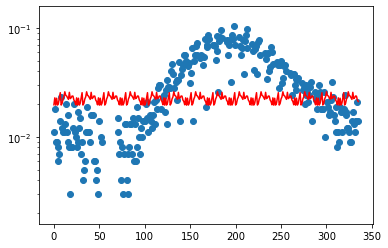

C:\Users\15829\AppData\Local\Temp\ipykernel_20984\2815976582.py:182: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log',base=10)


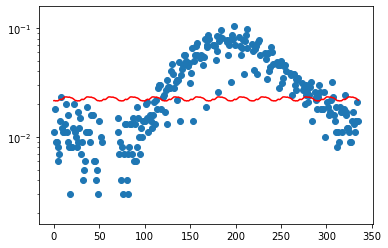

In [15]:
def ozone_data():
    """
        ozone_data
    Returns a vector of length 336 = 14*24 with the hourly ozone levels
    at Azusa, California, during the first 14 days of July 2014
    (discussed on page 319). 
    """

    # Hourly Ozone measurements in Azusa 
    # Values in parts per million;
    # Hourly 12am - 11pm; some measurements missing
    import numpy as np
    k=31;
    V = np.zeros((24, k));
    # Tuesday, July 1, 2014 
    V[:,0] = [ 0.011,  0.011,  0.012,  "NaN",    "NaN",    0.011,  0.013,  0.014,  
               0.022,  0.029,  0.037,  0.050,  0.067,  0.076,  0.086,  0.076,  
               "NaN",    0.044,  0.035,  0.027,  0.021,  0.018,  0.016,  0.017 ]
    # Wednesday, July 2, 2014
    V[:,1] = [ 0.018,  0.016,  0.015,  0.016,  "NaN",    0.015,  0.013,  0.014,
               "NaN",    0.029,  0.042,  0.056,  0.070,  0.083,  0.080,  0.086,
               0.074,  0.067,  0.045,  0.034,  0.024,  0.018,  0.014,  0.012 ]
    # Thursday, July 3, 2014
    V[:,2] = [ 0.009,  0.009,  0.007,  0.006,  "NaN",    0.007,  0.007,  0.014,
               0.018,  0.028,  0.046,  0.069,  0.087,  0.096,  0.105,  0.099,
               0.077,  0.060,  0.046,  0.033,  0.029,  0.018,  0.011,  0.012 ]
    # Friday, July 4, 2014
    V[:,3] = [ 0.009,  0.008,  0.009,  0.006,  "NaN",    0.009,  0.015,  0.020,
               0.028,  0.040,  0.057,  0.073,  0.079,  0.081,  0.070,  0.066,
               0.056,  0.047,  0.040,  0.035,  0.032,  0.026,  0.019,  0.011 ]
    # Saturday, July 5, 2014
    V[:,4] = [ 0.006,  0.003,  0.004,  0.004,  "NaN",    0.004,  0.006,  0.015,   
               0.030,  0.047,  0.056,  0.057,  "NaN",    "NaN",    "NaN",    "NaN", 
               "NaN",    "NaN",    "NaN",    "NaN",    0.014,  0.010,  0.008,  0.009 ]
    # Sunday, July 6, 2014
    V[:,5] = [ 0.008,  0.008,  0.005,  0.005,  "NaN",    0.008,  0.013,  0.021, 
               0.030,  0.038,  0.050,  "NaN",    "NaN",    "NaN",    "NaN",    "NaN", 
               "NaN",    "NaN",    "NaN",    "NaN",    "NaN",    "NaN",    0.011,  0.009 ]
    # Monday, July 7, 2014
    V[:,6] = [ 0.007,  0.008,  0.006,  0.003,  "NaN",    0.003,  0.006,  0.011,
               0.018,  0.028,  "NaN",    "NaN",    "NaN",    "NaN",    "NaN",    "NaN", 
               "NaN",    "NaN",    "NaN",    "NaN",    "NaN",    "NaN",    0.009,  0.014 ]
    # Tuesday, July 8, 2014
    V[:,7] = [ 0.014,  0.012,  0.011,  "NaN",    "NaN",    0.007,  0.008,  0.015, 
           "NaN",    "NaN",    "NaN",    0.053,  0.070,  "NaN",    "NaN",    "NaN", 
           "NaN",    "NaN",    "NaN",    0.031,  0.026,  0.021,  0.019,  0.017 ]
    # Wednesday, July 9, 2014
    V[:,8] = [ 0.023,  0.020,  0.019,  0.014,  "NaN",    0.013,  0.019,  0.016, 
               0.023,  0.032,  0.045,  0.057,  0.070,  0.078,  0.082,  0.072, 
               0.059,  0.049,  0.039,  0.027,  0.022,  0.019,  0.017,  0.013 ]
    # Thursday, July 10, 2014
    V[:,9] = [ 0.012,  0.011,  0.011,  "NaN",    "NaN",    0.013,  0.015,  0.014, 
                0.024,  0.033,  0.048,  0.055,  0.069,  0.074,  0.069,  0.062, 
                0.052,  0.046,  0.037,  0.028,  0.023,  0.016,  0.011,  0.011 ]
    # Friday, July 11, 2014
    V[:,10] = [ 0.011,  0.010,  0.011,  0.010,  "NaN",    0.004,  0.010,  0.012, 
                0.017,  0.022,  0.031,  0.046,  0.051,  0.057,  0.056,  0.041, 
                0.034,  0.028,  0.024,  0.020,  0.018,  0.017,  0.017,  0.014 ]
    # Saturday, July 12, 2014
    V[:,11] = [ 0.011,  0.008,  0.011,  0.009,  "NaN",    0.003,  0.007,  0.016, 
                0.027,  0.033,  0.039,  0.054,  0.062,  0.070,  0.065,  0.064, 
                0.058,  0.046,  0.038,  0.024,  0.023,  0.022,  0.018,  0.014 ]
    # Sunday, July 13, 2014
    V[:,12] = [ 0.013,  0.009,  0.009,  "NaN",    "NaN",    0.007,  0.012,  0.021, 
                0.033,  0.049,  0.065,  0.079,  0.084,  0.078,  0.077,  0.068, 
                0.059,  0.050,  0.038,  0.030,  0.030,  0.032,  0.024,  0.021 ]
    # Monday, July 14, 2014
    V[:,13] = [ 0.020,  0.017,  0.016,  "NaN",    "NaN",    0.008,  0.010,  0.013,  
                0.013,  0.014,  0.014,  0.019,  0.026,  0.032,  0.038,  0.038, 
                0.040,  0.031,  0.030,  0.026,  0.026,  0.023,  0.016,  0.014 ]
    # Tuesday, July 15, 2014
    V[:,14] = [ 0.013,  0.013,  0.010,  "NaN",    "NaN",    0.006,  0.010,  0.014, 
                0.018,  0.024,  0.030,  0.038,  0.048,  0.052,  0.048,  0.043,
                0.036,  0.026,  0.019,  0.016,  0.015,  0.014,  0.015,  "NaN" ]
    # Wednesday, July 16, 2014
    V[:,15] = [ 0.017,  0.015,  0.019,  "NaN",    "NaN",    0.012,  0.012,  0.012, 
                0.014,  0.018,  0.028,  0.036,  0.044,  0.052,  0.058,  "NaN",
                "NaN",    0.038,  0.028,  0.022,  0.019,  0.016,  0.018,  0.017 ]
    # Thursday, July 17, 2014
    V[:,16] = [ 0.016,  0.018,  0.017,  0.014,  "NaN",    0.017,  0.019,  "NaN",
                "NaN",    0.015,  0.020,  0.027,  0.037,  0.047,  0.053,  0.038, 
                0.035,  0.031,  0.025,  0.020,  0.016,  0.014,  0.013,  0.015 ]
    # Friday, July 18, 2014
    V[:,17] = [ 0.015,  0.013,  0.012,  "NaN",    "NaN",    0.008,  0.009,  "NaN", 
                "NaN",    "NaN",    "NaN",    "NaN",    0.044,  "NaN",    "NaN",    "NaN", 
                0.037,  0.030,  0.020,  0.013,  0.012,  0.010,  0.008,  0.009 ]
    # Saturday, July 19, 2014
    V[:,18] = [ 0.010,  0.010,  0.008,  "NaN",    "NaN",    0.006,  0.007,  0.010, 
                0.013,  0.014,  0.016,  0.023,  0.026,  0.031,  0.040,  0.037, 
                0.027,  0.024,  0.021,  0.018,  0.015,  0.011,  0.008,  0.007 ]
    # Sunday, July 20, 2014
    V[:,19] = [ 0.007,  0.005,  0.007,  0.007,  "NaN",    0.010,  0.012,  0.016, 
                0.019,  0.024,  0.030,  0.040,  0.053,  0.061,  0.068,  0.063, 
                0.060,  0.048,  0.028,  0.023,  0.021,  0.018,  0.015,  0.012 ]
    # Monday, July 21, 2014
    V[:,20] = [ 0.013,  0.011,  0.011,  0.008,  "NaN",    0.007,  0.011,  0.012, 
                0.016,  0.024,  0.031,  0.038,  0.047,  0.053,  0.048,  0.043, 
                0.036,  0.033,  0.027,  0.020,  0.016,  0.012,  0.008,  0.007 ]
    # Tuesday, July 22, 2014
    V[:,21] = [ 0.008,  0.007,  0.005,  "NaN",    "NaN",    0.004,  0.006,  "NaN", 
                "NaN",    "NaN",    "NaN",    0.047,  0.056,  0.058,  0.050,  0.042, 
                0.036,  0.031,  0.026,  0.015,  0.010,  0.008,  0.006,  0.007 ]
    # Wednesday, July 23, 2014
    V[:,22] = [ 0.010,  0.003,  0.003,  "NaN",    "NaN",    0.004,  0.005,  "NaN", 
                "NaN",    "NaN",    "NaN",    "NaN",    "NaN",    "NaN",    "NaN",    "NaN", 
                0.042,  0.038,  0.026,  0.019,  0.014,  0.009,  0.005,  0.006 ]
    # Thursday, July 24, 2014
    V[:,23] = [ 0.004,  0.006,  0.006,  "NaN",    "NaN",    0.003,  0.005,  0.010, 
                0.020,  0.026,  0.045,  0.070,  0.078,  0.094,  0.081,  0.082, 
                0.064,  0.056,  0.044,  0.035,  0.024,  0.031,  0.016,  0.006 ]
    # Friday, July 25, 2014
    V[:,24] = [ 0.009,  0.009,  0.014,  0.018,  "NaN",    0.007,  0.008,  0.014, 
                0.020,  0.032,  0.041,  0.061,  0.075,  0.081,  0.080,  0.065, 
                0.053,  0.046,  0.037,  0.028,  0.027,  0.028,  0.023,  0.020 ]
    # Saturday, July 26, 2014
    V[:,25] = [ 0.023,  0.021,  0.013,  0.011,  "NaN",    0.004,  0.008,  0.014,  
                0.023,  0.035,  0.048,  0.062,  0.073,  0.079,  0.074,  0.070, 
                0.063,  0.049,  0.041,  0.026,  0.029,  0.025,  0.022,  0.020 ]
    # Sunday, July 27, 2014
    V[:,26] = [ 0.015,  0.010,  0.013,  "NaN",    "NaN",    0.008,  0.011,  0.016, 
                0.025,  0.033,  0.038,  0.042,  0.058,  0.077,  0.090,  0.086, 
                0.064,  0.062,  0.044,  0.039,  0.033,  0.028,  0.030,  0.021 ]
    # Monday, July 28, 2014
    V[:,27] = [ 0.028,  0.024,  0.017,  "NaN",    "NaN",    0.012,  0.014,  0.010,
                0.013,  0.024,  0.032,  0.043,  0.051,  0.063,  0.070,  0.064, 
                0.055,  0.043,  0.037,  0.033,  0.024,  0.018,  0.013,  0.012 ]
    # Tuesday, July 29, 2014
    V[:,28] = [ 0.011,  0.013,  0.018,  "NaN",    "NaN",    0.004,  0.005,  0.009, 
                0.017,  0.031,  0.037,  0.044,  0.052,  0.060,  0.057,  0.058, 
                0.055,  0.045,  0.037,  0.029,  0.020,  0.013,  0.009,  "NaN" ]
    # Wednesday, July 30, 2014
    V[:,29] = [ "NaN",    0.006,  0.004,  0.003,  "NaN",    0.004,  0.005,  0.008,
                0.019,  0.034,  0.045,  0.064,  0.082,  0.093,  0.081,  0.079, 
                0.071,  0.056,  0.035,  0.029,  0.026,  0.014,  0.006,  0.005 ]
    # Thursday, July 31, 2014
    V[:,30] = [ 0.007,  0.004,  0.004,  0.003,  "NaN",    0.003,  0.005,  0.011, 
                0.019,  0.032,  0.045,  0.056,  0.069,  0.079,  0.076,  0.075,
                0.063,  0.055,  0.041,  0.026,  0.021,  0.012,  0.008,  0.011 ]

    k =14;
    return np.reshape(V[:,0:k],(k*24,1)) 

#15.3 Estimation and inversion
# Estimating a periodic time series
ozone = ozone_data() # a vector of length 14*24 = 336
k = 14
N = k*24
import matplotlib.pyplot as plt
plt.ion()
plt.scatter(np.arange(N),ozone)
plt.yscale('log') #数据给的不对，不明显

A = np.vstack([np.eye(24) for i in range(k)])
#periodic difference matrix
D = -np.eye(24) + np.vstack((np.column_stack([np.zeros(23),np.eye(23)]),np.hstack([1,np.zeros(23)])))
ind = [k for k in range(len(ozone)) if not np.isnan(ozone[k])] #判断是否为空值
As = [A[ind,:],D]
bs = [np.log(ozone[ind].reshape(len(ozone[ind]))),np.zeros(24)]  #需要把前半部分改为list形式

#solution for lambda = 1
lambdas = [1,1]
n = len(lambdas)
Atil = np.vstack([np.sqrt(lambdas[i])*As[i] for i in range(n)])
btil = np.hstack([np.sqrt(lambdas[i])*bs[i] for i in range(n)])
x = np.linalg.inv(Atil.T @ Atil)@(Atil.T @ btil)
print(x)
plt.scatter(np.arange(N),ozone)
plt.plot(np.arange(N), np.hstack([np.exp(x) for i in range(k)]),'r') #有误
plt.yscale('Log',base=10)
plt.ylim(10**(-2.8),10**(-0.8))
plt.show()

#solution for lambda = 100
lambdas = [1,100]
n = len(lambdas)
Atil = np.vstack([np.sqrt(lambdas[i])*As[i] for i in range(n)])
btil = np.hstack([np.sqrt(lambdas[i])*bs[i] for i in range(n)])
x = np.linalg.inv(Atil.T @ Atil)@(Atil.T @ btil)
plt.scatter(np.arange(N),ozone)
plt.plot(np.arange(N),np.hstack([np.exp(x) for i in range(k)]),'r')
plt.yscale('Log',base=10)
plt.ylim(10**(-2.8),10**(-0.8))
plt.show()
#又有错。。。无语啦

C:\Users\15829\AppData\Local\Temp\ipykernel_16056\2006545743.py:88: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.xscale('Log')


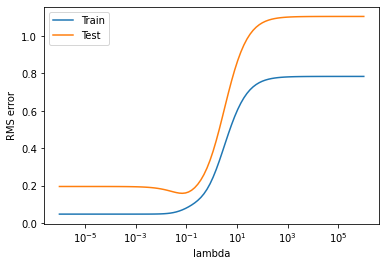

C:\Users\15829\AppData\Local\Temp\ipykernel_16056\2006545743.py:96: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.xscale('Log')


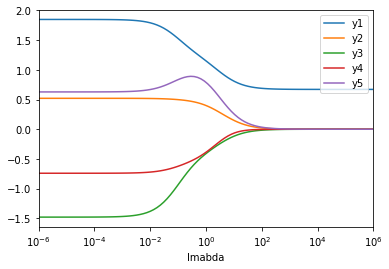

In [65]:

def regularized_fit_data():
    import numpy as np
    """
        regularized_fit_data
    Returns a dictionary `D` with data for the regularized data fitting 
    example on page 329 of VMLS.  The items in the dictionary are:
    * `D["xtrain"]`: vector of length 10 
    * `D["ytrain"]`: vector of length 10 
    * `D["xtest"]`: vector of length 20 
    * `D["ytest"]`: vector of length 20.
    """
    X = np.array([ 
    [1.06830e-01,  1.82422e+00],
    [2.55780e-01,  8.13549e-01],
    [2.71120e-01,  9.24060e-01],
    [3.02990e-01,  4.20670e-01],
    [5.02040e-01,  4.46178e-01],
    [6.58450e-01, -3.73407e-02],
    [6.84230e-01, -2.10935e-01],
    [7.02590e-01, -1.03327e-01],
    [7.34060e-01,  3.32097e-01],
    [9.40350e-01,  2.29278e+00]]);
    xtrain = X[:,0];
    ytrain = X[:,1];
    Xtest = np.array([
    [3.96674e-01, -1.05772e+00],
    [7.77517e-01,  8.79117e-01],
    [1.18400e-01,  1.98136e+00],
    [2.23266e-01,  8.67012e-01],
    [9.01463e-01,  2.13650e+00],
    [3.58033e-01, -7.01948e-01],
    [2.60402e-01,  9.41469e-01],
    [8.04281e-01,  1.49755e+00],
    [6.31664e-01,  5.50205e-01],
    [1.49704e-01,  1.34245e+00],
    [5.51333e-01,  1.21445e+00],
    [6.63999e-01,  4.49111e-03],
    [1.64948e-01,  9.57535e-01],
    [6.51698e-01,  7.78640e-02],
    [1.23026e-01,  1.73558e+00],
    [3.37066e-01, -3.25244e-01],
    [8.32080e-02,  2.56555e+00],
    [2.04422e-01,  1.10081e+00],
    [9.78000e-01,  2.70644e+00],
    [4.03676e-01, -1.10049e+00]]);
    xtest = Xtest[:,0];
    ytest = Xtest[:,1];
    return {"xtrain": xtrain, "ytrain": ytrain , 
        "xtest": xtest, "ytest": ytest}

#15.4 Regularized data fitting
#Import data as vectors xtrain,ytrain,xtest.ytest
D = regularized_fit_data()
xtrain = D['xtrain']
ytrain = D['ytrain']
xtest = D['xtest']
ytest = D['ytest']
N = len(ytrain)
Ntest = len(ytest)
p = 5
omega = np.array([13.69, 3.55, 23.25, 6.03])
phi = np.array([0.21, 0.02, -1.87, 1.72])
A = np.column_stack((np.ones(N),np.sin(np.outer(xtrain,omega)+np.outer(np.ones(N),phi))))
Atest = np.column_stack((np.ones(Ntest),np.sin(np.outer(xtest,omega)+np.outer(np.ones(Ntest),phi))))
npts = 100
lambdas = np.power(10,np.linspace(-6,6,npts))
err_train = np.zeros(npts)
err_test = np.zeros(npts)
thetas = np.zeros((p,npts))
As = [A,np.column_stack([np.zeros(p-1),np.eye(p-1)])] #题目中只需要保持后四个参数最小
bs = [ytrain,np.zeros(p-1)]

for k in range(npts):
    lam = [1,lambdas[k]]
    n = len(lam)
    Atil = np.vstack([np.sqrt(lam[i])*As[i] for i in range(n)])
    btil = np.hstack([np.sqrt(lam[i])*bs[i] for i in range(n)])
    theta = np.linalg.inv(Atil.T@Atil)@(Atil.T@btil)
    err_train[k] = (sum((ytrain - A @ theta)**2)/len(ytrain))**0.5
    err_test[k] = (sum((ytest - Atest @ theta)**2)/len(ytest))**0.5 
    thetas[:,k] = theta
    
import matplotlib.pyplot as plt
plt.ion()
#plot RMS errors
plt.plot(lambdas,err_train.T)
plt.plot(lambdas,err_test.T)
plt.xscale('Log')
plt.xlabel('lambda')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylabel('RMS error')
plt.show()

#plot coefficients
plt.plot(lambdas,thetas.T)
plt.xscale('Log')
plt.xlabel('lmabda')
plt.xlim(1e-6,1e6)
plt.legend(['y1', 'y2', 'y3', 'y4', 'y5'], loc='upper right')
plt.show()

In [19]:
#15.5 complexity
#the kernel trick
m = 100
n = 5000
A = np.random.normal(size = (m,n))
b = np.random.normal(size = m)
xdes = np.random.normal(size = n)
lam = 2.0
# Find x that minimizes ||Ax - b||^2 + lambda ||x||^2
import time
start = time.time()
xhat1 = solve_via_backsub(np.vstack((A,np.sqrt(lam)*np.eye(n))),np.hstack((b.T,np.sqrt(lam)*xdes)))
end = time.time()
print('xhat1 time:',end-start)

#use kernel trick
start = time.time()
Q,R = QR_factorization(np.vstack((A.T,np.sqrt(lam)*np.eye(m))))
xhat2 = A.T@(solve_via_backsub(R,solve_via_backsub(R.T,(b-A@xdes))))+xdes
end = time.time()
print('xhat2 time:', end - start)

#compare solutions
print(np.linalg.norm(xhat1-xhat2))

xhat1 time: 456.93490529060364
xhat2 time: 0.16524457931518555
5.268783518170656e-12
